<a href="https://colab.research.google.com/github/Locung201/Group3_PTDLUD_HCMUS_2425/blob/main/Gd2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="background-color: #D3D3D3; font-weight: bold;">Giai đoạn 2: Phân tích EDA (Exploratory Data Analysis)</span>


<style>
    body {
        margin: 0;
        font-family: Arial, sans-serif;
    }
    h2 {
        color: #4CAF50;
        text-align: center;
        font-size: 26px;
    }
    table {
        width: 80%;
        margin: 50px auto; /* Căn giữa bảng */
        border-collapse: collapse;
        font-size: 20px;
    }
    th, td {
        border: 1px solid #dddddd;
        text-align: center;
        padding: 15px;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 22px;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:nth-child(odd) {
        background-color: #ffffff;
    }
    .icon {
        color: #4CAF50;
        font-size: 22px;
        margin-right: 8px;
    }
    a {
        text-decoration: none;
        color: #4CAF50;
    }
</style>

<h2>Nhóm 3 - CSC12110 - PTDLUD</h2>

<table>
    <tr>
        <th>MSSV</th>
        <th>Họ Tên</th>
        <th>Email</th>
    </tr>
    <tr>
        <td>18127008</td>
        <td><i class="icon">👨‍💻</i> Lê Mạnh Hoàng</td>
        <td><a href="mailto:lmhoang18@clc.fitus.edu.vn">lmhoang18@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127211</td>
        <td><i class="icon">👩‍💻</i> Nguyễn Vũ Tường An</td>
        <td><a href="mailto:nvtan21@clc.fitus.edu.vn">nvtan21@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127699</td>
        <td><i class="icon">👩‍💻</i> Lô Thủy Tiên</td>
        <td><a href="mailto:lttien21@clc.fitus.edu.vn">lttien21@clc.fitus.edu.vn</a></td>
    </tr>
</table>



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
from IPython.display import display, HTML

In [3]:
# Chọn file CSV trên máy tính

# Thay đường dẫn này bằng đường dẫn đến file
file_path = "D:/lolo/lo hc/DA/cleaned_2425_QC.xlsx"

# Đọc dữ liệu từ file Excel
df = pd.read_excel(file_path)

# Hiển thị vài dòng đầu tiên
print("Some top rows of the data:")
df.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0
1,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0
2,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 02:31,0
4,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 03:36,0


## <span style="background-color: #D3D3D3; font-weight: bold;">1. Phân tích đơn biến (Univariate Analysis), Bivariate Analysis:

<h2 style="color: #4CAF50;">a. Kiểm tra sự cân bằng giữa nhãn: click/không click quảng cáo.</h2>


Số lượng của từng nhãn (Clicked on Ad):
Clicked on Ad
0    500
1    500
Name: count, dtype: int64


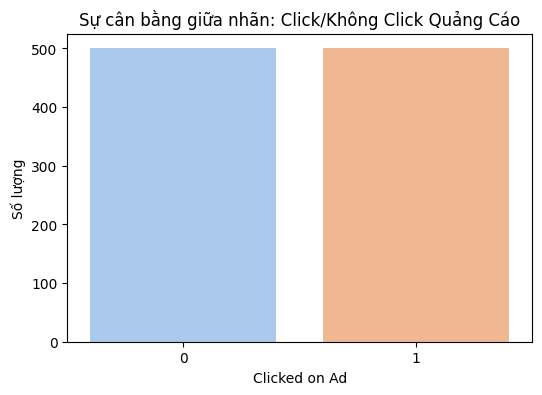

In [4]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Phân tích đơn biến (Univariate Analysis)
# Sử dụng value_counts() để đếm số lượng của từng nhãn (Clicked on Ad)
label_counts = df['Clicked on Ad'].value_counts()
print("\nSố lượng của từng nhãn (Clicked on Ad):")
print(label_counts)

# Trực quan hóa với biểu đồ cột (countplot) để dễ quan sát sự mất cân bằng
plt.figure(figsize=(6, 4))
sns.countplot(x='Clicked on Ad', data=df, palette='pastel')
plt.title('Sự cân bằng giữa nhãn: Click/Không Click Quảng Cáo')
plt.xlabel('Clicked on Ad')
plt.ylabel('Số lượng')
plt.show()

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
<p style="color: #333333; font-size: 16px;">
    Biểu đồ cột cho thấy sự so sánh giữa số lượng người dùng <strong>đã nhấp vào quảng cáo</strong> và <strong>chưa nhấp vào quảng cáo</strong>.
    <br>
    Có thể thấy rằng dữ liệu về việc người dùng nhấp vào quảng cáo có tỷ lệ <strong>xấp xỉ 50/50</strong>.
</p>

<h2 style="color: #4CAF50;">b. Phân tích các biến số (age, income, gender, daily internet usage, etc.).</h2>

Basic Statistics:
               Age   Area Income  Daily Internet Usage         Male  \
count  1000.000000   1000.000000           1000.000000  1000.000000   
mean     36.018000  55025.321364            180.000100     0.481000   
std       8.779907  13343.228619             43.902339     0.499889   
min      19.000000  19373.553750            104.780000     0.000000   
25%      29.000000  47031.802500            138.830000     0.000000   
50%      35.000000  57012.300000            183.130000     0.000000   
75%      42.000000  65470.635000            218.792500     1.000000   
max      61.000000  79484.800000            269.960000     1.000000   

       Clicked on Ad  
count     1000.00000  
mean         0.50000  
std          0.50025  
min          0.00000  
25%          0.00000  
50%          0.50000  
75%          1.00000  
max          1.00000  


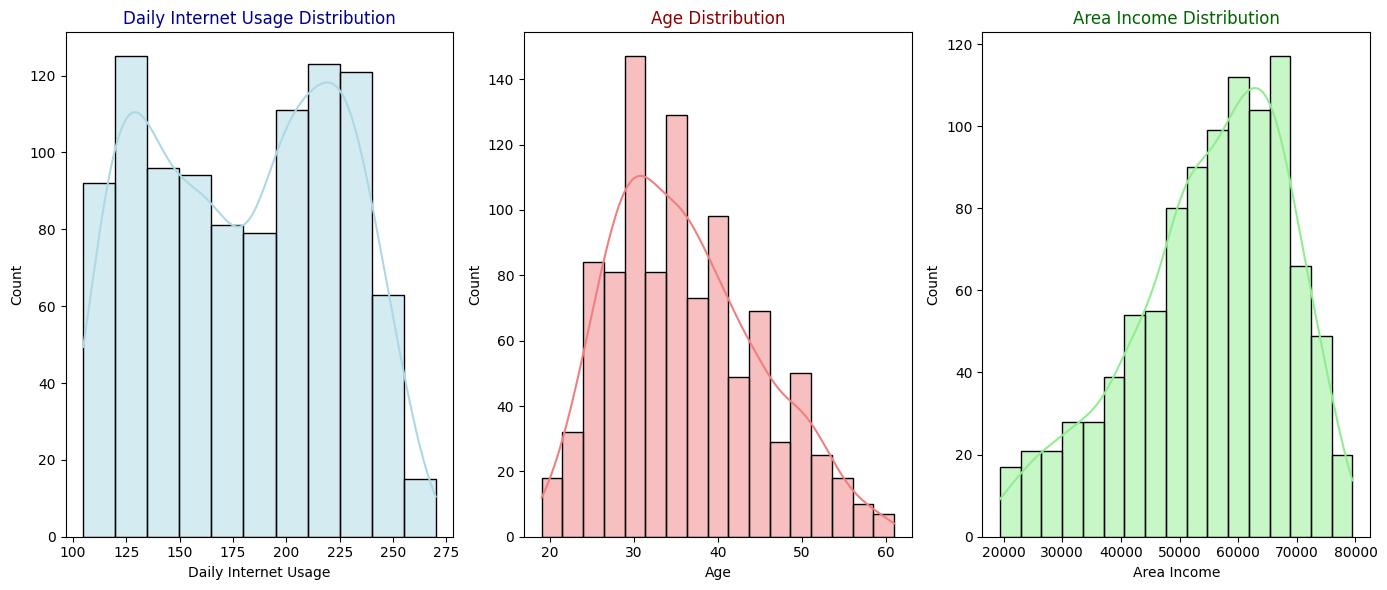

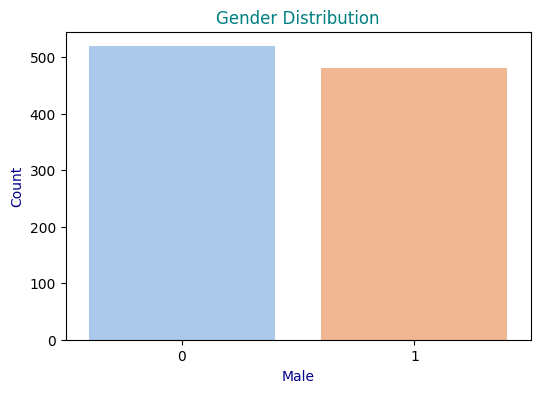

In [5]:
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
# Calculate basic statistics
statistics = df.describe()

# Print basic statistics
print("Basic Statistics:")
print(statistics)

# Plot histograms for continuous variables
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Daily Internet Usage'], kde=True, color='lightblue')
plt.title('Daily Internet Usage Distribution', color='darkblue')

plt.subplot(1, 3, 2)
sns.histplot(df['Age'], kde=True, color='lightcoral')
plt.title('Age Distribution', color='darkred')

plt.subplot(1, 3, 3)
sns.histplot(df['Area Income'], kde=True, color='lightgreen')
plt.title('Area Income Distribution', color='darkgreen')

plt.tight_layout()
plt.show()

# Plot bar plot for categorical variable (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Male', data=df, palette='pastel')
plt.title('Gender Distribution', color='teal')
plt.xlabel('Male', color='darkblue')
plt.ylabel('Count', color='darkblue')
plt.show()


<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    Trung bình độ tuổi từ <strong>30 đến 40 tuổi </strong> là độ tuổi sử dụng Internet với các mục đích khác nhau nhiều nhất, và số lượng người dùng Internet giảm dần khi tuổi càng cao..
    <br><br>
    Phần lớn những người truy cập Internet có thu nhập từ <strong>50000 - 70000 USD/năm</strong>.
    <br><br>
    Trung bình người dùng Internet truy cập từ <strong> 100 - 225 phút </strong> mỗi ngày.
    <br><br>
    Chênh lệch về giới tính của người dùng Internet hầu như không quá lớn, có thể nói gần như là bằng nhau về số lượng nam và nữ.
</p>

<h2 style="color: #4CAF50;">Kết luận:</h2>
<p style="color: #333333; font-size: 18px;">
    Phần lớn người dùng truy cập Internet đều là những người đang trong độ tuổi làm việc và có thu nhập ổn định, do đó việc truy cập Internet phần lớn phục vụ cho công việc của họ.
</p>

<h2 style="color: #4CAF50;">c. Phân tích thời điểm sử dụng website trong ngày</h2>

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_16684\2938612366.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


0     2016-03-27 00:53:00
1     2016-04-04 01:39:00
2     2016-03-13 20:35:00
3     2016-01-10 02:31:00
4     2016-06-03 03:36:00
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:00
997   2016-02-01 17:24:00
998   2016-03-24 02:35:00
999   2016-06-03 21:43:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [7]:
# Phân loại thời điểm trong ngày
def classify_time_of_day(timestamp):
    hour = timestamp.hour
    if 6 <= hour < 12:  # Khung giờ sáng
        return 'Morning'
    elif 12 <= hour < 15:  # Khung giờ trưa
        return 'Afternoon'
    elif 15 <= hour < 18:  # Khung giờ chiều
        return 'Evening'
    else:  # Khung giờ đêm
        return 'Night'

# Áp dụng hàm phân loại cho cột Timestamp
df['Time_of_Day'] = df['Timestamp'].apply(classify_time_of_day)

# Kiểm tra kết quả
df[['Timestamp', 'Time_of_Day']].head()


,Timestamp,Time_of_Day
0,2016-03-27 00:53:00,Night
1,2016-04-04 01:39:00,Night
2,2016-03-13 20:35:00,Night
3,2016-01-10 02:31:00,Night
4,2016-06-03 03:36:00,Night


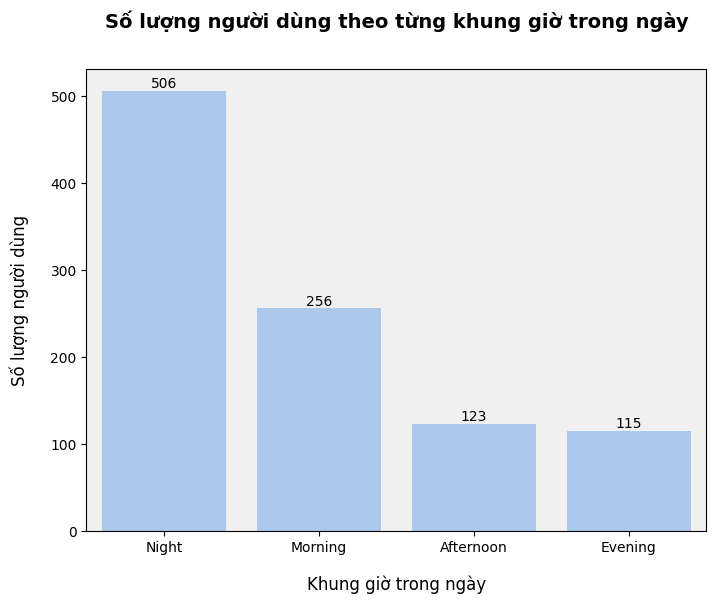

In [8]:
sns.set_palette("pastel")

# Đếm số lượng bản ghi cho mỗi khung giờ
time_of_day_counts = df['Time_of_Day'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values)

ax.set_facecolor('#f0f0f0')
plt.title('Số lượng người dùng theo từng khung giờ trong ngày', fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Khung giờ trong ngày', fontsize=12, labelpad=15)
plt.ylabel('Số lượng người dùng', fontsize=12, labelpad=15)

# Hiển thị số lượng trên cột
for i in range(len(time_of_day_counts)):
    plt.text(i, time_of_day_counts.values[i],
             str(time_of_day_counts.values[i]),
             ha='center', va='bottom', fontsize=10, color='black')

# Hiển thị biểu đồ
plt.show()


<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Đêm</strong> là thời điểm phổ biến nhất để người dùng truy cập website, có thể do đây là thời gian rảnh rỗi nhất trong ngày.
    <br><br>
    <strong>Sáng</strong> cũng là thời điểm khá phổ biến, có thể do thói quen truy cập internet vào đầu ngày.
    <br><br>
    <strong>Trưa và Chiều</strong> là thời điểm ít người dùng truy cập website nhất, có thể do bận rộn với các hoạt động hàng ngày.
</p>

<h2 style="color: #4CAF50;">Kết luận:</h2>
<p style="color: #333333; font-size: 18px;">
    Người dùng có xu hướng sử dụng website vào ban đêm nhiều hơn các thời gian khác trong ngày.
    <br><br>
    Sự giảm dần số lượng người dùng từ <strong>"Night"</strong> đến <strong>"Morning"</strong> và <strong>"Afternoon"</strong> có thể phản ánh thói quen sử dụng internet của người dùng, khi họ có xu hướng truy cập website vào thời gian tự do, như ban đêm sau khi hoàn thành công việc trong ngày.
</p>


<h2 style="color: #4CAF50;">d. Phân tích chủ đề quảng cáo. Xác định các chủ đề quảng cáo phổ biến.</h2>

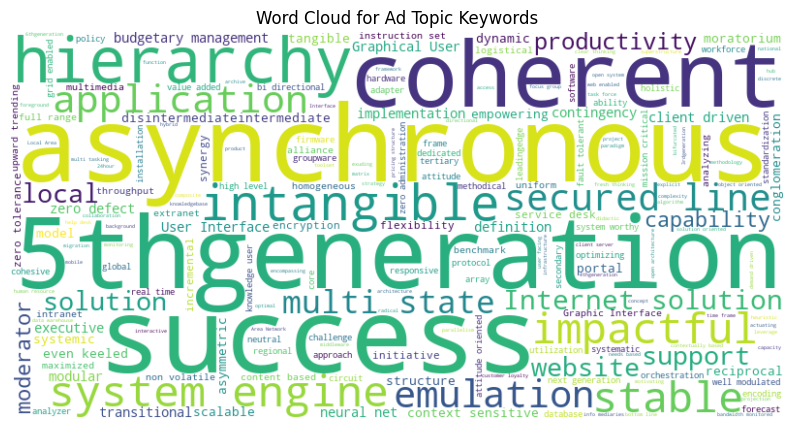

In [9]:
# Extract keywords from Ad Topic Line
df['Ad Topic Keywords'] = df['Ad Topic Line'].apply(lambda x: ' '.join(x.split()[1:]))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Ad Topic Keywords']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ad Topic Keywords')
plt.show()

<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Từ khóa nổi bật</strong>: Các từ khóa như <strong>"coherent", “asynchronous”, “5thgeneration”, “system engine”, “hierarchy”, “Internet solution”, “secure”, “application”</strong>, xuất hiện nhiều lần và có kích thước lớn trong Word Cloud. Điều này cho thấy các chủ đề quảng cáo thường tập trung vào các khái niệm liên quan đến công nghệ, hệ thống, và giải pháp
    <br><br>
    <strong>Xu hướng chủ đề</strong>: Các chủ đề quảng cáo phổ biến thường liên quan đến việc cải thiện hiệu suất, tính linh hoạt, và khả năng tương tác của các hệ thống và phần mềm. Các từ khóa như <strong>"coherent", “stable”,  "dynamic", “moderator”, “capability”, “support”</strong> cho thấy sự tập trung vào việc cung cấp các giải pháp công nghệ tiên tiến và hiệu quả.
    <br><br>
    <strong>Đa dạng chủ đề</strong>: Mặc dù có một số từ khóa xuất hiện nhiều lần, Word Cloud cũng cho thấy sự đa dạng trong các chủ đề quảng cáo. Các từ khóa như <strong>"orchestration", "multi-state", "success", "impactful"</strong> cho thấy các quảng cáo không chỉ tập trung vào một khía cạnh duy nhất mà còn bao gồm nhiều khía cạnh khác nhau của công nghệ và giải pháp.
    <br><br>
    <strong>Tầm quan trọng của từ khóa</strong>: Kích thước của các từ khóa trong Word Cloud phản ánh tầm quan trọng và tần suất xuất hiện của chúng trong các dòng chủ đề quảng cáo. Các từ khóa lớn hơn như <strong>"coherent", “asynchronous”, "5thgeneration", “success”</strong> cho thấy chúng là những yếu tố quan trọng và thường được nhấn mạnh trong các quảng cáo.
</p>

<h2 style="color: #4CAF50;">Kết luận:</h2>
<p style="color: #333333; font-size: 18px;">
    Nhìn chung, kết quả phân tích cho thấy các chủ đề quảng cáo trong dataset này chủ yếu tập trung vào các giải pháp công nghệ tiên tiến, hiệu suất cao và khả năng tương tác linh hoạt. Điều này có thể phản ánh xu hướng chung trong ngành công nghệ và quảng cáo hiện nay.
</p>

<h2 style="color: #4CAF50;">e. Phân tích thu nhập khu vực (Area Income). Đánh giá phân phối thu nhập trung bình của người dùng.</h2>

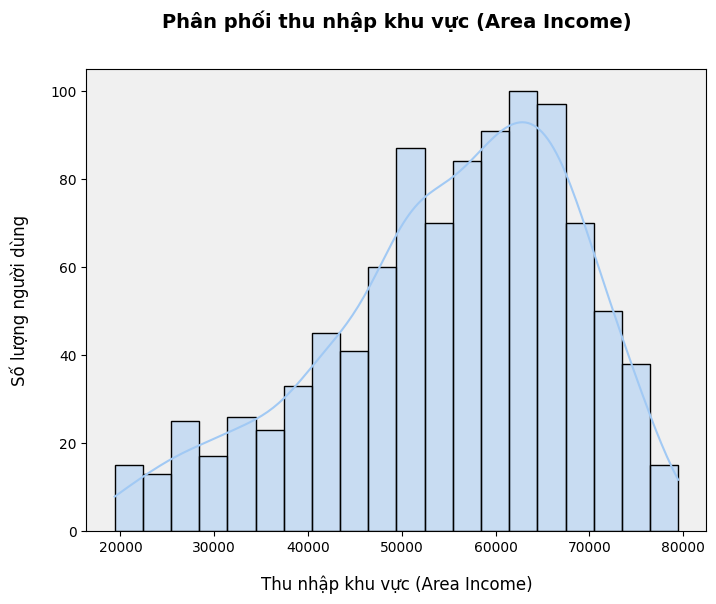

In [10]:
sns.set_palette("pastel")

# Vẽ histogram để quan sát phân phối thu nhập
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Area Income'], kde=True, bins=20)
ax.set_facecolor('#f0f0f0')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối thu nhập khu vực (Area Income)', fontsize=14, fontweight='bold', pad=30)
plt.xlabel('Thu nhập khu vực (Area Income)', fontsize=12, labelpad=15)
plt.ylabel('Số lượng người dùng', fontsize=12, labelpad=15)

# Hiển thị biểu đồ
plt.show()

<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    Biểu đồ histogram trên cho thấy phân phối thu nhập của một khu vực cụ thể. Dựa trên hình dạng của biểu đồ, có thể rút ra một số nhận xét sau:
    <br><br>
    <strong>Phân phối lệch phải (right-skewed):</strong> Phần lớn người dân trong khu vực có thu nhập trung bình hoặc dưới trung bình. Một số ít người có thu nhập rất cao, tạo nên "cái đuôi" dài về phía bên phải của biểu đồ. Điều này cho thấy sự chênh lệch thu nhập khá lớn giữa các nhóm người dân.
    <br><br>
    <strong>Điểm đỉnh:</strong> Thu nhập trung bình của khu vực rơi vào khoảng 50.000 - 60.000 đơn vị tiền tệ. Đây là mức thu nhập phổ biến nhất của người dân trong khu vực.
    <br><br>
    <strong>Độ phân tán:</strong> Dữ liệu thu nhập khá phân tán, thể hiện qua các cột biểu đồ có độ cao khác nhau. Điều này cho thấy sự đa dạng trong mức sống của người dân.
</p>



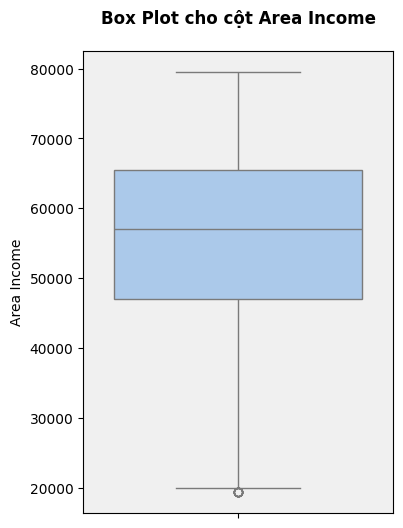

In [11]:
sns.set_palette("pastel")
# Tạo biểu đồ hộp (boxplot) cho cột 'Area Income'
plt.figure(figsize=(4, 6))
ax = sns.boxplot(y='Area Income', data=df)
ax.set_facecolor('#f0f0f0')

plt.title('Box Plot cho cột Area Income', fontsize=12, fontweight='bold', pad=20)
plt.show()

<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Khoảng biến thiên:</strong> Khoảng cách giữa giá trị nhỏ nhất và lớn nhất khá lớn, cho thấy sự phân tán của dữ liệu thu nhập khá rộng. Có một số người có thu nhập rất cao (ngoại lệ ở phía trên) và một số người có thu nhập rất thấp (ngoại lệ ở phía dưới).
    <br><br>
    <strong>Giá trị trung vị:</strong> Đường ngang giữa hộp biểu thị giá trị trung vị (median), cho thấy khoảng 50% dân số có thu nhập dưới mức này và 50% còn lại có thu nhập trên mức này. Trong trường hợp này, giá trị trung vị nằm ở khoảng 60.000.
    <br><br>
    <strong>Các tứ phân vị:</strong> Hộp biểu thị khoảng giữa 50% dữ liệu. Các đường thẳng ở hai đầu hộp là các tứ phân vị thứ nhất (Q1) và thứ ba (Q3). Khoảng cách giữa Q1 và Q3 cho biết khoảng biến thiên của 50% dữ liệu ở giữa.
    <br><br>
    <strong>Các ngoại lệ:</strong> Các điểm nằm ngoài các "râu" của biểu đồ được coi là các ngoại lệ. Trong trường hợp này, có một số ngoại lệ ở cả hai phía, cho thấy có một số người có thu nhập rất cao hoặc rất thấp so với phần còn lại của dân số.
</p>

<h2 style="color: #4CAF50;">Kết luận</h2>
<p style="color: #333333; font-size: 18px;">
    <br>
    <strong>Bất bình đẳng thu nhập:</strong> Khu vực này có mức độ bất bình đẳng thu nhập khá cao. Một nhóm nhỏ người giàu có thu nhập cao gấp nhiều lần so với phần lớn dân số.
    <br>
    <strong>Thu nhập trung bình:</strong> Mức thu nhập trung bình của khu vực nằm trong khoảng 50.000 - 60.000 đơn vị tiền tệ, một số ít người dùng có thu nhập rất cao hoặc rất thấp. Tuy nhiên, do sự phân tán lớn của dữ liệu, con số này có thể không phản ánh chính xác mức sống của phần lớn người dân.
</p>

<h2 style="color: #4CAF50;">f. Phân tích phân bố quốc gia (Country). Đánh giá sự phân bố người dùng theo quốc gia.</h2>


Số lượng người dùng theo từng quốc gia:
Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64


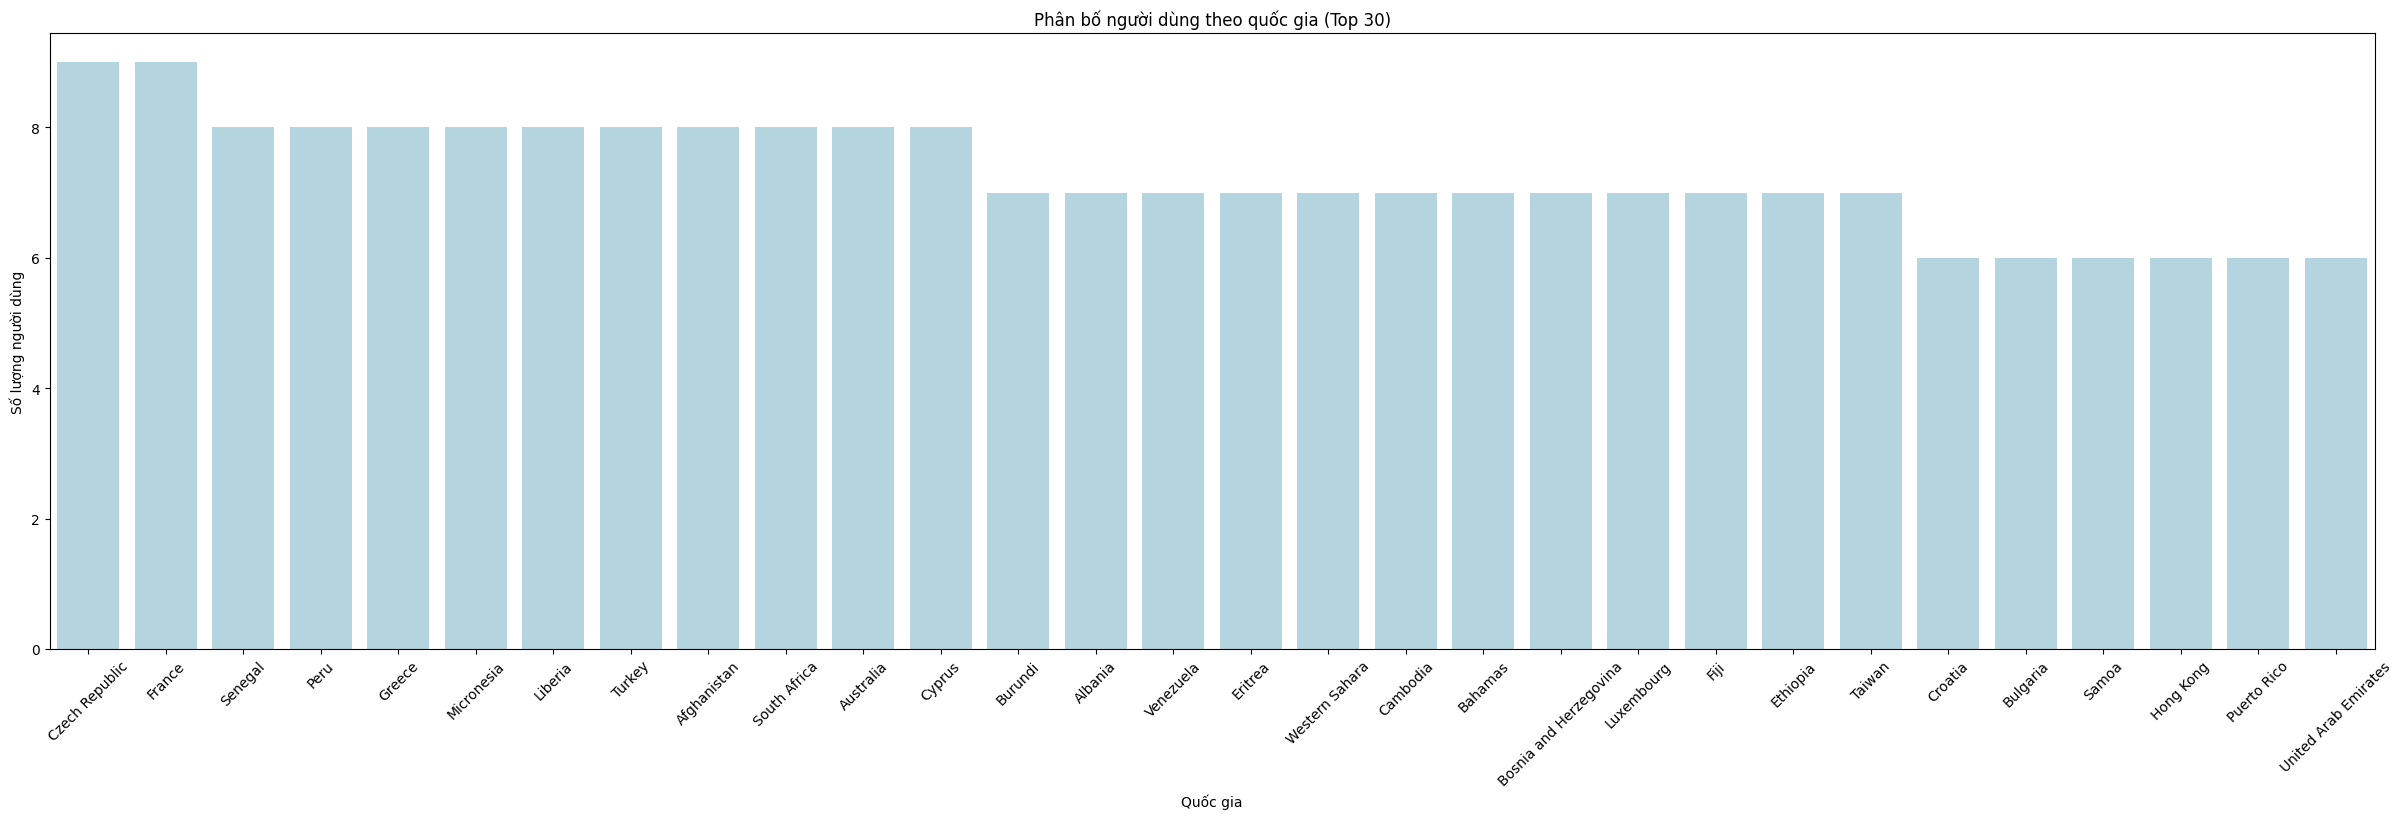


Quốc gia có số lượng người dùng nhiều nhất: Czech Republic (9 người dùng)
Quốc gia có số lượng người dùng ít nhất: British Indian Ocean Territory (Chagos Archipelago) (1 người dùng)


In [12]:
# Phân tích phân bố quốc gia (Country)
country_counts = df['Country'].value_counts()
print("\nSố lượng người dùng theo từng quốc gia:")
print(country_counts)

# Lấy top 30 quốc gia có số lượng người dùng cao nhất
top_countries = country_counts.head(30)

# Tính tổng số người dùng của các quốc gia khác
others_count = country_counts.iloc[30:].sum()

# Thêm danh mục "Other" vào dữ liệu
#top_countries['Other'] = others_count

plt.figure(figsize=(30, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, color="lightblue")
plt.title('Phân bố người dùng theo quốc gia (Top 30)')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng người dùng')
plt.xticks(rotation=45)
plt.show()

# In thông tin về các quốc gia nhiều nhất và ít nhất
max_country = country_counts.idxmax()
min_country = country_counts.idxmin()

print(f"\nQuốc gia có số lượng người dùng nhiều nhất: {max_country} ({country_counts[max_country]} người dùng)")
print(f"Quốc gia có số lượng người dùng ít nhất: {min_country} ({country_counts[min_country]} người dùng)")


In [13]:
# Hiển thị 10 quốc gia có số lượng người dùng cao nhất và số lượng tương ứng.
table1 = pd.crosstab(df['Country'], columns='count').sort_values('count', ascending=False).head(10)

# Quan hệ giữa hai biến: Country (Quốc gia) và Clicked on Ad (Người dùng có click vào quảng cáo hay không).
table2 = pd.crosstab(df['Country'], df['Clicked on Ad']).sort_values(1, ascending=False).head(10)

# Chuyển bảng thành HTML
table1_html = table1.to_html()
table2_html = table2.to_html()

# Hiển thị cả hai bảng trong một hàng
display(HTML(f"""
    <div style="display: flex; justify-content: space-between;">
        <div style="width: 25%;">{table1_html}</div>
        <div style="width: 130%;">{table2_html}</div>
    </div>
"""))


col_0,count
Country,
Czech Republic,9
France,9
Cyprus,8
Australia,8
Afghanistan,8
Greece,8
Peru,8
Turkey,8
South Africa,8


<h2 style="color: #4CAF50; font-size: 20px;">Nhận xét:</h2>

<p style="color: #333333; font-size: 16px;">
    <strong>Đánh giá sự phân bố người dùng theo quốc gia:</strong><br>
    Sử dụng <code>value_counts()</code> để đếm số lượng người dùng theo từng quốc gia cho thấy sự phân bố người dùng không đồng đều giữa các quốc gia. Phân bố không đồng đều: Số lượng người giữa các quốc gia có sự khác biệt đáng kể.
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Trực quan hóa với biểu đồ cột (bar plot):</strong><br>
    Biểu đồ cột giúp chúng ta dễ dàng quan sát sự phân bố người dùng theo từng quốc gia. Biểu đồ này cho thấy rõ ràng sự chênh lệch về số lượng người dùng giữa các quốc gia, giúp chúng ta nhận diện nhanh chóng các quốc gia có số lượng người dùng cao và thấp.
    
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Xác định quốc gia có số lượng người dùng nhấp quảng cáo:</strong>
    <ul>
        <p style="color: #333333; font-size: 16px;">
    <strong>Australia:</strong> Mặc dù số lượng mẫu không quá lớn, nhưng tỷ lệ người nhấp vào quảng cáo ở Australia khá cao.
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Ethiopia, Liechtenstein:</strong> Các quốc gia này có tỷ lệ người nhấp vào quảng cáo thấp nhất trong số các quốc gia được khảo sát.
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Các quốc gia còn lại:</strong> Đa số các quốc gia khác có tỷ lệ người nhấp vào quảng cáo tương đối ổn định, không có sự chênh lệch quá lớn.
</p>
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">2. Phân tích đa biến (Bivariate Analysis):

<h2 style="color: #4CAF50;">a. Quan sát mối quan hệ giữa Clicked on Ad.</h2>

**Mối quan hệ giữa "Clicked on Ad" và độ tuổi (Age)**

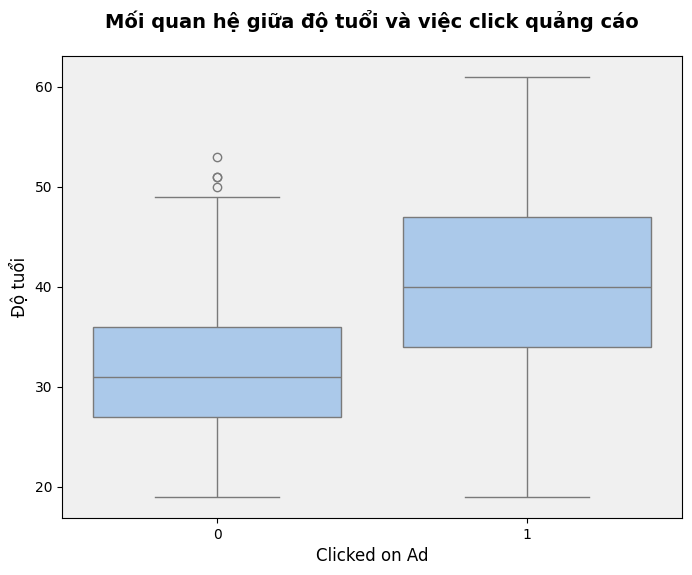

In [14]:
sns.set_palette("pastel")
# Vẽ boxplot để quan sát mối quan hệ giữa độ tuổi và Clicked on Ad
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Clicked on Ad', y='Age', data=df)
ax.set_facecolor('#f0f0f0')
# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa độ tuổi và việc click quảng cáo', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Clicked on Ad', fontsize=12)
plt.ylabel('Độ tuổi', fontsize=12)

# Hiển thị biểu đồ
plt.show()


<h2 style="color: #4CAF50;">Nhận xét chung</h2>
<p style="color: #333333; font-size: 18px;">
    Biểu đồ <strong>boxplot</strong> cung cấp một cái nhìn tổng quan về sự phân bố của độ tuổi đối với hai nhóm người: những người đã click vào quảng cáo (Clicked on Ad = 1) và những người chưa click (Clicked on Ad = 0).
    <br><br>
    <strong>Độ tuổi trung bình của người click vào quảng cáo cao hơn:</strong> Đường kẻ ngang bên trong hộp (đại diện cho giá trị trung vị) của nhóm đã click vào quảng cáo nằm ở vị trí cao hơn so với nhóm chưa click. Điều này cho thấy, nhìn chung, những người có xu hướng click vào quảng cáo có độ tuổi cao hơn.
    <br><br>
    <strong>Sự phân tán của độ tuổi:</strong> Cả hai nhóm đều có sự phân tán về độ tuổi, tuy nhiên, nhóm đã click vào quảng cáo có khoảng biến thiên (khoảng cách giữa giá trị nhỏ nhất và lớn nhất) lớn hơn. Điều này có nghĩa là trong nhóm đã click vào quảng cáo, có cả những người trẻ tuổi và những người lớn tuổi, trong khi nhóm chưa click có thể tập trung nhiều hơn vào một độ tuổi nhất định.
    <br><br>
    <strong>Giá trị ngoại lệ:</strong> Cả hai nhóm đều có một số giá trị ngoại lệ, tức là những điểm dữ liệu nằm xa so với phần còn lại. Điều này cho thấy có một số người rất trẻ hoặc rất lớn tuổi đã click vào quảng cáo, và cũng có một số người trẻ hoặc lớn tuổi không click vào quảng cáo.
</p>

**Mối quan hệ giữa "Clicked on Ad" và thu nhập (Area Income)**

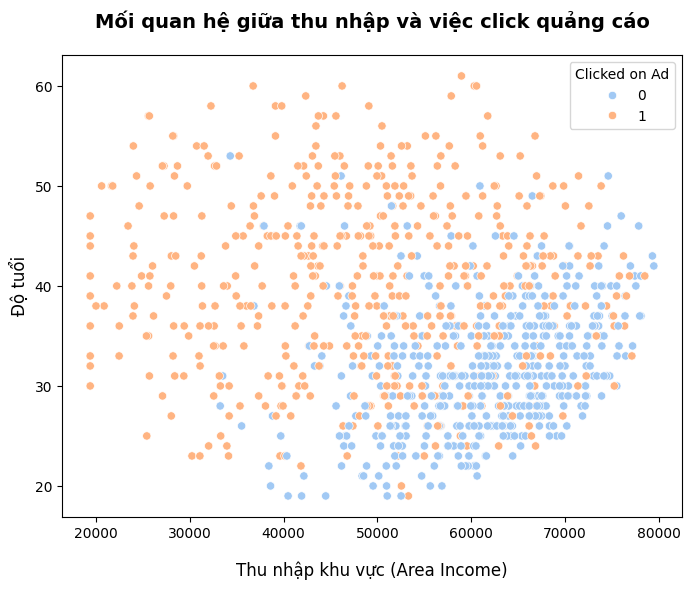

In [15]:
sns.set_palette("pastel")
# Vẽ scatter plot để quan sát mối quan hệ giữa thu nhập và việc click quảng cáo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area Income', y='Age', hue='Clicked on Ad', data=df, palette='pastel')

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Mối quan hệ giữa thu nhập và việc click quảng cáo', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Thu nhập khu vực (Area Income)', fontsize=12, labelpad=15)
plt.ylabel('Độ tuổi', fontsize=12)

# Hiển thị biểu đồ
plt.show()


<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    Biểu đồ phân tán cho thấy mối quan hệ giữa thu nhập của một cá nhân và hành vi click vào quảng cáo của họ. Mỗi điểm trên biểu đồ đại diện cho một cá nhân, với vị trí trên trục hoành thể hiện thu nhập và vị trí trên trục tung thể hiện độ tuổi. Các điểm có màu sắc khác nhau để phân biệt những người đã click vào quảng cáo (màu cam) và những người chưa click (màu xanh).
    <br><br>
    <strong>Không có mối quan hệ tuyến tính rõ ràng:</strong> Các điểm dữ liệu phân bố khá đều trên biểu đồ, không có xu hướng tăng hoặc giảm rõ ràng khi thu nhập tăng lên. Điều này cho thấy không có mối quan hệ tuyến tính trực tiếp giữa thu nhập và việc click quảng cáo.
    <br><br>
    <strong>Sự phân tán dữ liệu:</strong> Các điểm dữ liệu phân tán khá rộng, cả trong nhóm đã click và chưa click. Điều này cho thấy có nhiều yếu tố khác ngoài thu nhập ảnh hưởng đến hành vi click quảng cáo.
    <br><br>
    <strong>Sự chồng lấp giữa hai nhóm:</strong> Các điểm dữ liệu của hai nhóm (đã click và chưa click) chồng lấp lên nhau khá nhiều, cho thấy không có sự phân chia rõ ràng giữa hai nhóm dựa trên thu nhập.
</p>


**Mối quan hệ giữa "Clicked on Ad" và giới tính (Male)**

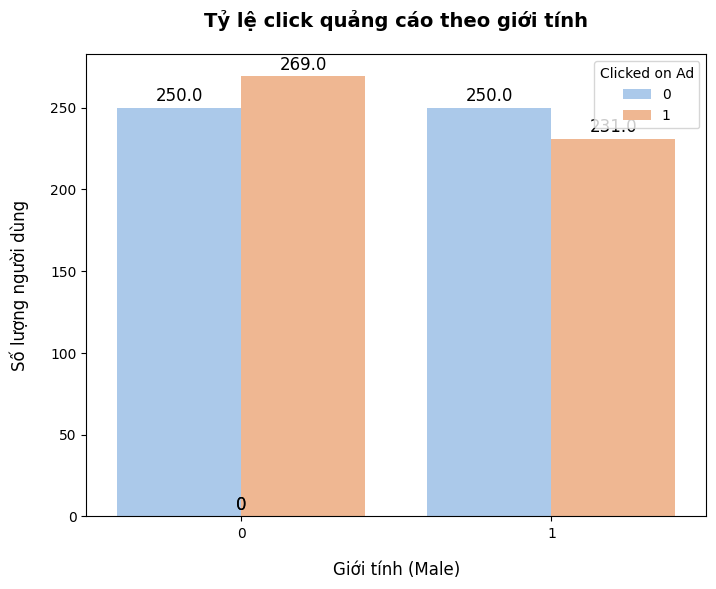

In [16]:
# Dùng count plot để quan sát tỷ lệ click quảng cáo theo giới tính
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Male', hue='Clicked on Ad', data=df)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.title('Tỷ lệ click quảng cáo theo giới tính', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Giới tính (Male)', fontsize=12,labelpad=15)
plt.ylabel('Số lượng người dùng', fontsize=12, labelpad=15)

# Hiển thị số lượng trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
# Hiển thị biểu đồ
plt.show()


<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    Biểu đồ cột trên hiển thị số lượng người dùng đã và chưa click vào quảng cáo, phân chia theo giới tính (giả sử 0 là nữ, 1 là nam).
    <br><br>
    <strong>Sự khác biệt giữa hai giới:</strong>
    <br>
    <strong>Phái nữ:</strong> Có một số lượng lớn phái nữ tham gia khảo sát, và một phần đáng kể trong số đó đã click vào quảng cáo.
    <br>
    <strong>Phái nam:</strong> Tương tự, phái nam cũng có số lượng tham gia lớn và tỷ lệ click vào quảng cáo cũng khá cao.
</p>

<h2 style="color: #4CAF50;">Kết luận</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Không có sự khác biệt rõ rệt về tỷ lệ click:</strong> Cả nam và nữ đều có tỷ lệ click vào quảng cáo tương đối cao và không có sự chênh lệch quá lớn giữa hai giới. Điều này cho thấy, về mặt giới tính, không có nhóm nào đặc biệt quan tâm hoặc không quan tâm đến quảng cáo hơn.
</p>


**Kiểm tra sự tương quan giữa các biến độc lập và biến mục tiêu (Correlation Heatmap)**

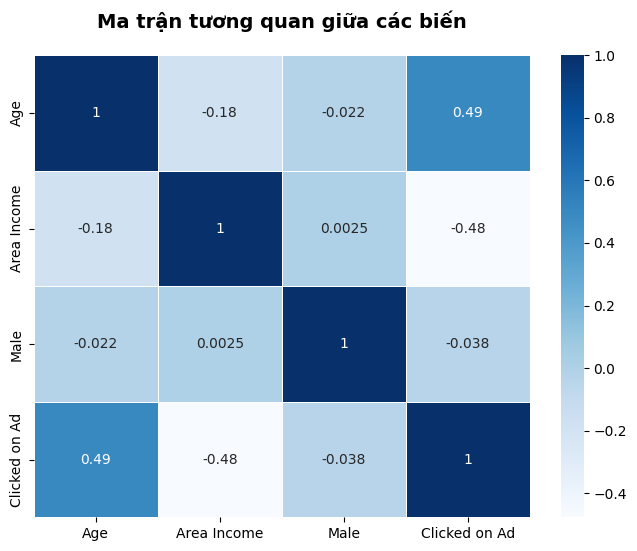

In [17]:
sns.set_palette("pastel")
# Chọn các cột phù hợp với biến độc lập và biến mục tiêu
correlation_data = df[['Age', 'Area Income', 'Male', 'Clicked on Ad']]

# Tính ma trận tương quan
correlation_matrix = correlation_data.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Thêm tiêu đề cho heatmap
plt.title('Ma trận tương quan giữa các biến', fontsize=14, fontweight='bold', pad=20)

# Hiển thị heatmap
plt.show()


Ma trận tương quan là một công cụ hữu ích để đánh giá mối quan hệ tuyến tính giữa các biến số trong một tập dữ liệu. Mỗi ô trong ma trận cho biết mức độ tương quan giữa hai biến tương ứng. Giá trị hệ số tương quan dao động từ -1 đến 1:

1: Hai biến có mối quan hệ tương quan dương hoàn hảo (khi một biến tăng, biến kia cũng tăng).

-1: Hai biến có mối quan hệ tương quan âm hoàn hảo (khi một biến tăng, biến kia giảm).

0: Hai biến không có mối quan hệ tuyến tính.
<h2 style="color: #4CAF50;">Nhận xét</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Tuổi và việc click vào quảng cáo:</strong> Có mối quan hệ tương quan dương vừa phải (0.5). Điều này có nghĩa là khi tuổi tăng lên, khả năng người dùng click vào quảng cáo cũng có xu hướng tăng lên.
    <br><br>
    <strong>Thu nhập và việc click vào quảng cáo:</strong> Có mối quan hệ tương quan âm vừa phải (-0.48). Điều này có nghĩa là khi thu nhập tăng lên, khả năng người dùng click vào quảng cáo có xu hướng giảm đi.
    <br><br>
    <strong>Giới tính và các biến khác:</strong> Giới tính (Male) có mối tương quan rất thấp với các biến còn lại, cho thấy giới tính ít ảnh hưởng đến tuổi, thu nhập và hành vi click vào quảng cáo trong tập dữ liệu này.
    <br><br>
    <strong>Các biến khác:</strong> Các biến còn lại có mối tương quan rất thấp hoặc không có mối quan hệ tuyến tính với nhau.
</p>

<h2 style="color: #4CAF50;">Kết luận</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Tuổi tác là yếu tố có ảnh hưởng tích cực đến hành vi click vào quảng cáo:</strong> Người lớn tuổi có xu hướng click vào quảng cáo nhiều hơn so với người trẻ tuổi.
    <br><br>
    <strong>Thu nhập có ảnh hưởng tiêu cực đến hành vi click vào quảng cáo:</strong> Người có thu nhập cao có xu hướng click vào quảng cáo ít hơn so với người có thu nhập thấp.
    <br><br>
    <strong>Giới tính không phải là yếu tố quyết định:</strong> Giới tính không có mối liên hệ rõ ràng với hành vi click vào quảng cáo trong tập dữ liệu này.
</p>



<h2 style="color: #4CAF50;">b. Mối quan hệ giữa "Clicked on Ad" và thời gian sử dụng Internet (Daily Internet Usage)</h2>

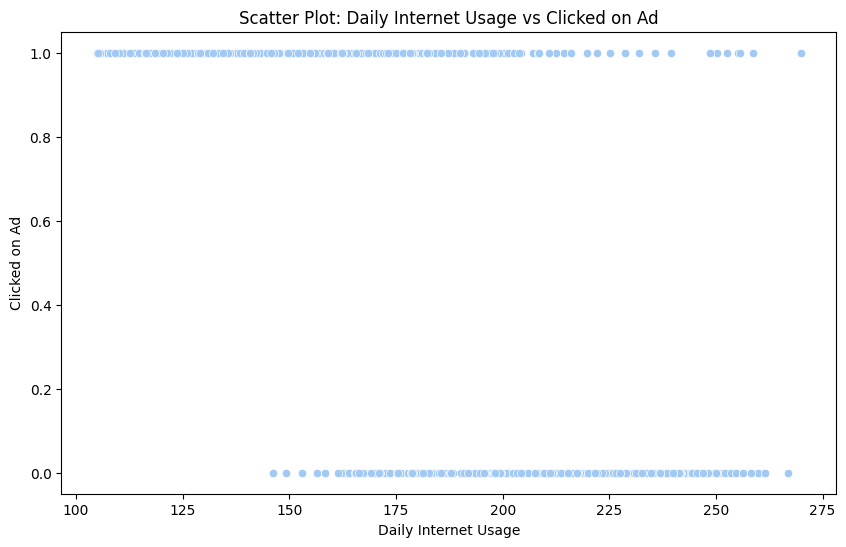

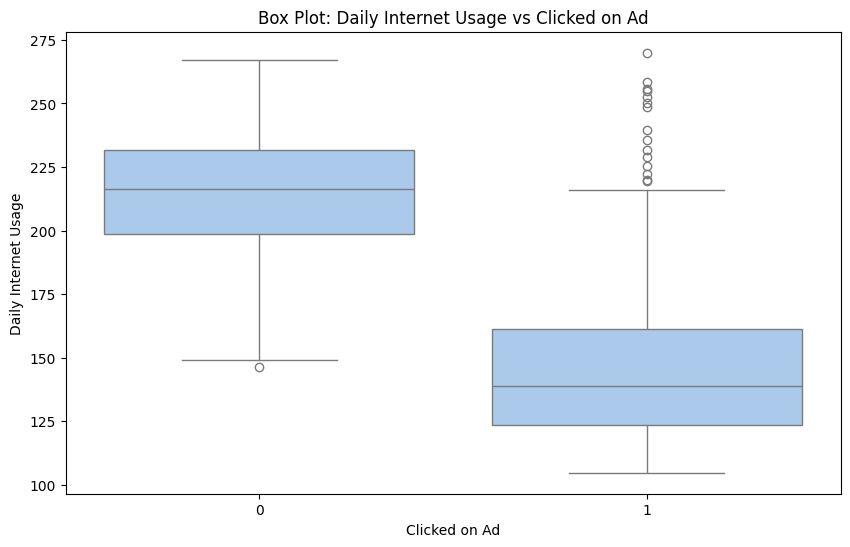

In [18]:
# Plot scatter plot for Daily Internet Usage vs Clicked on Ad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Internet Usage', y='Clicked on Ad', data=df)
plt.title('Scatter Plot: Daily Internet Usage vs Clicked on Ad')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Clicked on Ad')
plt.show()

# Plot box plot for Daily Internet Usage vs Clicked on Ad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df)
plt.title('Box Plot: Daily Internet Usage vs Clicked on Ad')
plt.xlabel('Clicked on Ad')
plt.ylabel('Daily Internet Usage')
plt.show()

<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 18px;">
    <strong>Scatter plot</strong> cho thấy một sự phân tán rõ ràng giữa thời gian sử dụng Internet hàng ngày và khả năng click quảng cáo.
    <br><br>
    Không có một xu hướng rõ ràng nào cho thấy rằng thời gian sử dụng Internet hàng ngày ảnh hưởng trực tiếp đến việc click quảng cáo. Các điểm dữ liệu phân bố khá đều giữa hai nhóm (click và không click quảng cáo).
    <br><br>
    <strong>Box plot</strong> cho thấy sự phân bố của thời gian sử dụng Internet giữa hai nhóm người dùng: những người click quảng cáo và những người không click quảng cáo.
    <br><br>
    Nhóm người dùng không click quảng cáo có thời gian sử dụng Internet hàng ngày trung bình <strong>cao hơn một chút</strong> so với nhóm người dùng click quảng cáo.


</p>

<h2 style="color: #4CAF50;">Kết luận:</h2>
<p style="color: #333333; font-size: 18px;">
    Dựa trên các biểu đồ <strong>scatter plot</strong> và <strong>box plot</strong>, có thể thấy rằng thời gian sử dụng Internet hàng ngày <strong>không có ảnh hưởng rõ ràng và đáng kể</strong> đến việc click quảng cáo. Các yếu tố khác có thể đóng vai trò quan trọng hơn trong việc quyết định người dùng có click vào quảng cáo hay không..


<h2 style="color: #4CAF50;">b. Phân tích thời gian sử dụng website theo các đặc điểm nhân khẩu học (tuổi, thu nhập, thành phố).</h2>

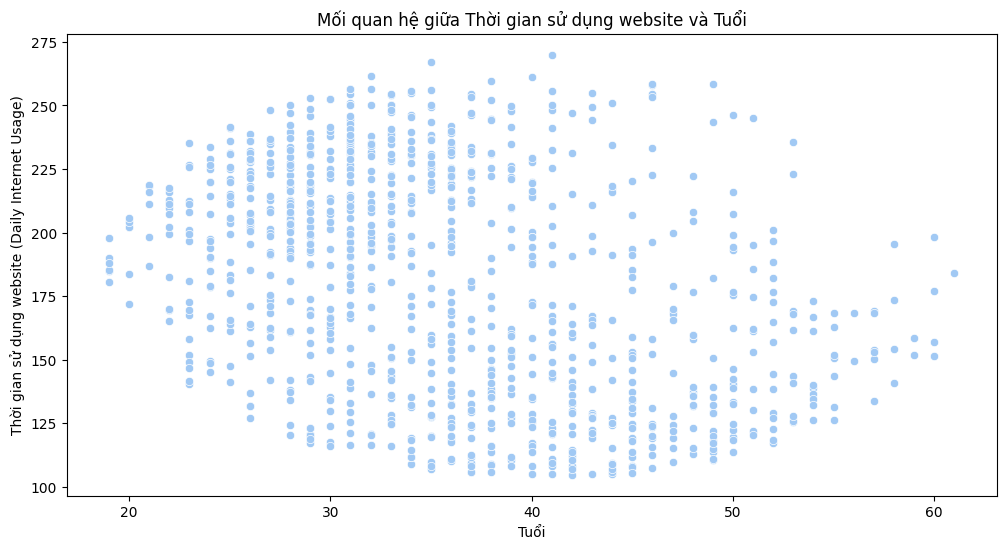

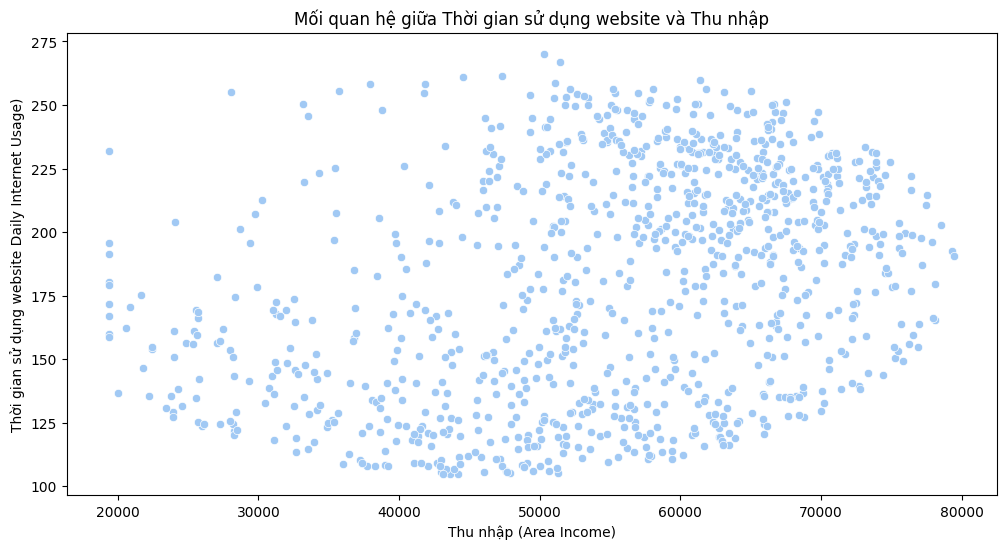

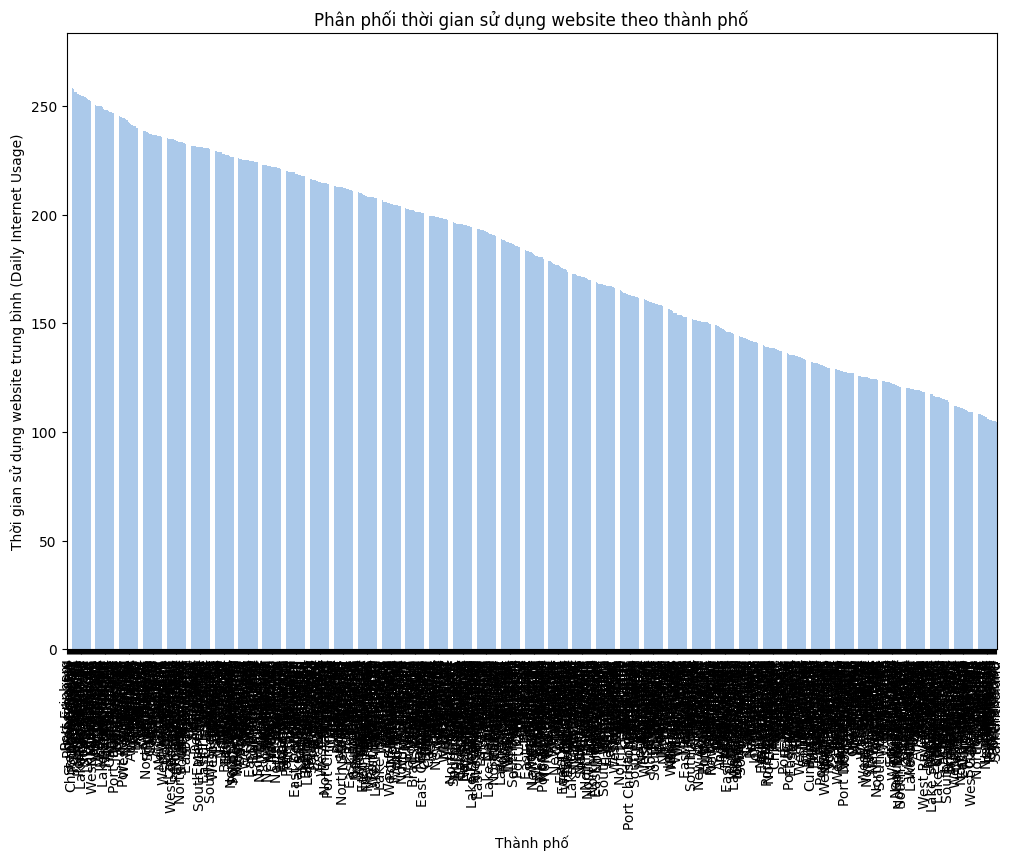

In [19]:
# Phân tích hai biến (Bivariate Analysis)

# Theo độ tuổi và thu nhập: Dùng scatter plot để xem mối quan hệ giữa Daily Internet Usage và Age hoặc Area Income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Daily Internet Usage', data=df)
plt.title('Mối quan hệ giữa Thời gian sử dụng website và Tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Thời gian sử dụng website (Daily Internet Usage)')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area Income', y='Daily Internet Usage', data=df)
plt.title('Mối quan hệ giữa Thời gian sử dụng website và Thu nhập')
plt.xlabel('Thu nhập (Area Income)')
plt.ylabel('Thời gian sử dụng website Daily Internet Usage)')
plt.show()

# Theo thành phố: Dùng bar plot để xem phân phối thời gian sử dụng theo thành phố
city_time_spent = df.groupby('City')['Daily Internet Usage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=city_time_spent.index, y=city_time_spent.values)
plt.title('Phân phối thời gian sử dụng website theo thành phố')
plt.xlabel('Thành phố')
plt.ylabel('Thời gian sử dụng website trung bình (Daily Internet Usage)')
plt.xticks(rotation=90)
plt.show()

<h2 style="color: #4CAF50;">Nhận xét tổng quan</h2>
<p style="color: #333333; font-size: 16px;">
    <strong>Phân tích mối quan hệ giữa thời gian sử dụng website và tuổi (Age):</strong><br>
    Scatter plot cho thấy mối quan hệ giữa <em>Daily Time Spent on Site</em> và <em>Age</em>.<br>
    Kết quả cho thấy không có mối quan hệ rõ ràng giữa tuổi và thời gian sử dụng website. Các điểm dữ liệu phân bố khá rải rác, cho thấy rằng tuổi không phải là yếu tố quyết định chính đến thời gian sử dụng website.
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Phân tích mối quan hệ giữa thời gian sử dụng website và thu nhập (Area Income):</strong><br>
    Scatter plot cho thấy mối quan hệ giữa <em>Daily Time Spent on Site</em> và <em>Area Income</em>.<br>
    Kết quả cũng cho thấy không có mối quan hệ rõ ràng giữa thu nhập và thời gian sử dụng website. Các điểm dữ liệu phân bố khá rải rác, cho thấy rằng thu nhập không phải là yếu tố quyết định chính đến thời gian sử dụng website.
</p>

<p style="color: #333333; font-size: 16px;">
    <strong>Phân tích phân phối thời gian sử dụng theo thành phố (City):</strong><br>
    Bar plot cho thấy phân phối thời gian sử dụng website trung bình theo từng thành phố.<br>
    Kết quả cho thấy có sự khác biệt rõ ràng về thời gian sử dụng website giữa các thành phố. Một số thành phố có thời gian sử dụng website trung bình cao hơn nhiều so với các thành phố khác, cho thấy rằng yếu tố địa lý có thể ảnh hưởng đến thói quen sử dụng website của người dùng.
</p>


## <span style="background-color: #D3D3D3; font-weight: bold;">Standardizing Data</span>

<p style="font-size: 16px; color: #555555;">
    Ta có thể thấy những cột có kiểu dữ liệu là object như Ad Topic Line, City, Country có vô số giá trị kiểu <strong>string</strong> tồn tại trên các cột này, tuy nhiên ta không thể sắp xếp một thứ tự nào rõ ràng dành cho các giá trị trên, đồng thời không có giá trị nào chiếm trọng số trong tất cả giá trị. Vì thế ta sữ dụng phương pháp <strong>Label Encoding
</p>

In [20]:
# Identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

# Apply label encoding to each object column and store the encoders
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Print the standardizing data
print(df.head(10))

print("Standardizing completed.")

Index(['Ad Topic Line', 'City', 'Country', 'Time_of_Day', 'Ad Topic Keywords'], dtype='object')
   Age  Area Income  Daily Internet Usage  Ad Topic Line  City  Male  Country  \
0   35     61833.90                256.09             91   961     0      215   
1   31     68441.85                193.77            464   903     1      147   
2   26     59785.94                236.50            566   111     0      184   
3   29     54806.18                245.89            903   939     1      103   
4   35     73889.99                225.58            766   805     0       96   
5   23     59761.56                226.74            805   282     1      158   
6   33     53852.85                208.36            222    46     0      145   
7   48     24593.33                131.76            723   671     1       12   
8   30     68862.00                221.51            107   884     1       82   
9   20     55642.32                183.82            454   712     1       78   

            

In [21]:
# Function to display original values and their corresponding labels
def display_label_mappings(encoders):
    for col, le in encoders.items():
        print(f"Column: {col}")
        for class_index, class_label in enumerate(le.classes_):
            print(f"  {class_index}: {class_label}")
        print()

# Display the label mappings
display_label_mappings(label_encoders)

Column: Ad Topic Line
  0: Adaptive 24hour Graphic Interface
  1: Adaptive asynchronous attitude
  2: Adaptive context-sensitive application
  3: Adaptive contextually-based methodology
  4: Adaptive demand-driven knowledgebase
  5: Adaptive uniform capability
  6: Advanced 24/7 productivity
  7: Advanced 5thgeneration capability
  8: Advanced didactic conglomeration
  9: Advanced disintermediate data-warehouse
  10: Advanced exuding conglomeration
  11: Advanced full-range migration
  12: Advanced heuristic firmware
  13: Advanced local task-force
  14: Advanced modular Local Area Network
  15: Advanced systemic productivity
  16: Advanced web-enabled standardization
  17: Ameliorated actuating workforce
  18: Ameliorated bandwidth-monitored contingency
  19: Ameliorated client-driven forecast
  20: Ameliorated coherent open architecture
  21: Ameliorated contextually-based collaboration
  22: Ameliorated discrete extranet
  23: Ameliorated exuding encryption
  24: Ameliorated exuding

In [22]:
print("\nInformation about the data structure:")
df.info()


Information about the data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   1000 non-null   int64         
 1   Area Income           1000 non-null   float64       
 2   Daily Internet Usage  1000 non-null   float64       
 3   Ad Topic Line         1000 non-null   int64         
 4   City                  1000 non-null   int64         
 5   Male                  1000 non-null   int64         
 6   Country               1000 non-null   int64         
 7   Timestamp             1000 non-null   datetime64[ns]
 8   Clicked on Ad         1000 non-null   int64         
 9   Time_of_Day           1000 non-null   int64         
 10  Ad Topic Keywords     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 86.1 KB


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét:</strong>
</div>
<p style="font-size: 16px; color: #555555;">
    Các cột có kiểu dữ liệu object đã được chuyển đổi thành các giá trị số nguyên. Điều này giúp dễ dàng hơn trong việc thực hiện các phân tích thống kê và mô hình hóa dữ liệu.
</p>
<p style="font-size: 16px; color: #555555;">
    Việc standardizing các cột object bằng <strong>Label Encoding</strong> giúp dữ liệu trở nên nhất quán, dễ xử lý và tương thích hơn với các mô hình học máy. Tuy nhiên, <strong>Label Encoding</strong> không giữ lại thông tin thứ tự giữa các giá trị, điều này có thể ảnh hưởng đến một số phân tích nhất định.
</p>

In [24]:
file_path_excel = 'cleaned_EDA_2425_QC.xlsx'
df.to_excel(file_path_excel, index=False)
print(f'Data đã được lưu thành công tại: {file_path_excel}')


Data đã được lưu thành công tại: cleaned_EDA_2425_QC.xlsx
